# העמסת אופרטורים

אחת הסיבות המרכזיות לכך שתכנות מונחה עצמים בפייתון נוח ואינטואיטיבי היא האפשרות לגרום לאובייקטים מותאמים אישית להתנהג ממש כמו טיפוסים מובנים. לדוגמא, ראינו שקיימות מתודות קסם, המאפשרות להפעיל פונקציות מובנות בצורה טבעית, כמו `len` ו-`print`.

ביחידה זו נרחיב את סט הכלים של הפונקציות הקסם שלנו באמצעות **העמסת אופרטורים (operator overloading)**:     
בנושאים הקודמים למדנו על שימוש באופרטורים אריתמטיים והשוואתיים בנושאים הקודמים. לדוגמא, ראינו שניתן לחבר מספרים שלמים על-ידי `+`, שניתן להשוות בין מחרוזות על-ידי `==`,`<` או `>`. כל זה מתאפשר בזכות העמסת אופרטורים - מנגנון שבו אנחנו **מגדירים במחלקה שלנו מה המשמעות של פעולה אריתמטית או השוואתית על מופעים מהמחלקה**. ביחידה זו נראה כיצד לממש העמסת אופרטורים במחלקה שלנו וכיצד להשתמש במימוש זה. 


## ייצוג מספרים רציונליים

מספר רציונלי הוא מספר שניתן לייצג כשבר מהצורה $\frac{n}{d}$ (מעתה נכתוב n/d), כאשר n ו-d הם מספרים שלמים ו-d שונה מאפס. זהו בעצם כל מספר שניתן לכתוב כחלוקה בין שני שלמים.   
לדוגמא, 1/2, 2/3, 112/239 ואפילו 2/1 הם כולם מספרים רציונליים. גם מספרים שלמים נכללים בקבוצה הזו, משום שכל שלם ניתן לייצג עם מכנה 1 (למשל $5 = 5/1$).

בתרגיל הבא נבנה מחלקה המייצגת מספר רציונלי בפייתון:

- הפקודה `print` תעבוד בצורה "טבעית", כלומר, להדפיס מונה/מכנה  
- יש לתמוך בפעולות חיבור, חיסור, כפל וחילוק.  
- הטיפוס צריך להיות בלתי ניתן לשינוי (Immutable).  
- עליו להרגיש כמו טיפוס מובנה בשפה.  
- דוגמת שימוש:
    
```python
    half = Rational(1,2)
    two_thirds = Rational(2,3)
    half / (2 + two_thirds)
    sum([1, Rational(3,2), 2])
    9/2
```


### בנאי המחלקה

במחלקה `Rational` ישנם שני שדות: המונה (`n`) והמכנה (`d`). שניהם מספרים שלמים, והמכנה שונה מאפס. 
אובייקט חדש מטיפוס זה נוצר על ידי קריאה לבנאי עם המונה והמכנה. למשל, הקריאה `Rational(3, 5)` תיצור את השבר 3/5.   
לעומת זאת, הקריאה `Rational(4, 1)` תיצור את המספר השלם 4.

In [ ]:
class Rational:
    """ Represents a rational number
    attributes: n, d """

    def __init__(self, n, d):
        """n: numerator
        d: denominator"""
        self.numer = n
        self.denom = d


#### שיפור הבנאי
כעת, כדי להגדיר מספר שלם (כמו 4/1), נצטרך להעביר לבנאי 2 פרמטרים - מונה ומכנה.  
אולי היינו מעדיפים לאפשר הגדרה של מספרים שלמים בצורה הבאה:
```python
r = Rational(5)
```
ולקבל 1 אוטומטית במכנה. 
```python
>>> r=Rational(5)
>>> print(r.numer, r.denom)
5 1
```

```{admonition} **עצרו וחישבו**  כיצד ניתן לעשות זאת?
:class: dropdown, caution

על מנת לממש זאת, ניתן להגדיר **ערך ברירת מחדל** לפרמטר הקלט `d`:

``` python
    def __init__(self, n, d=1):
        """n: numerator
        d: denominator"""
        self.numer = n

        self.denom = d

```


In [1]:
class Rational:
    def __init__(self, n, d=1):
        """n: numerator
        d: denominator"""
        self.numer = n

        self.denom = d

In [55]:
r1=Rational(5)
print(r1.numer, r1.denom)
r2=Rational(5,2)
print(r2.numer, r2.denom)

5 1
5 2


## בדיקות תקינות קלט - ולידציה (Validation)

כעת נוסיף למחלקה שלנו מנגנון **ולידציה** (בדיקת תקינות), כדי לוודא שלא יווצרו שדות לא הגיוניים.  
במקרה של מספר רציונלי, **אסור שהמכנה יהיה שווה לאפס**, מפני שהגדרה מתמטית כזו אינה קיימת. לכן, בשלב הולידציה, נוודא שהמכנה שנמסר שונה מ0.  

הולידציה תתרחש בתוך את הבדיקות בתוך הבנאי (`__init__`). כאשר המשתמש יוצר אובייקט חדש, הערכים שהועברו לפרמטרים נבדקים, ואם הם אינם עומדים בתנאים (כלומר `d == 0`), נדפיס הודעת שגיאה.  

באופן זה נבטיח כי בעת יצירת הודעת מופע לא תקין של המחלקה `Rational` תודפס הודעה שגיאה בהתאם.

In [ ]:
class Rational:
    def __init__(self, n, d=1):
        """n: numerator
        d: denominator"""
        if d == 0:
            print("denominator is set to 1, cannot be zero")
            d = 1
        self.numer = n
        self.denom = d

```{admonition} **שימו לב**
:class: error
מאחר שפעולות חשבוניות מסוימות עשויות אינן אפשריות כאשר המכנה שווה לאפס, החלטנו **לשנות את הערך של `d`** למרות שמדובר בקלט לא תקין.
כיוון שביצענו פעולה "לא סטנדרטית", נדפיס למי שהשתמש בפונקציה הודעה אינדיקטיבית, שמסבירה שהקלט לא היה תקין, וגם איזה תיקון עשינו עבורו.

```

```{admonition} **כדאי לדעת**
:class: info
קיים בפייתון מנגנון מיוחד אשר מאפשר ליצור שגיאות משלנו, כמו השגיאות בהן נתקלתם עד כה (Value Error, Index Error וכו'). בצורה זו, היינו יכולים לייצר שגיאה שתפסיק את ריצת התכנית במקרה בו קיבלנו קלט לא תקין.

יצירה וטיפול בשגיאות אינם נכללים בנושאי הלימוד של קורס זה.
אם תרצו להעמיק בנושא — ניתן לקרוא בהרחבה בתיעוד הרשמי של פייתון [כאן](https://docs.python.org/3/tutorial/errors.html#:~:text=8.4.%20Raising%20Exceptions%C2%B6).

```




### מתודת `__repr__`

כעת נרצה להדפיס את האובייקט בצורה קריאה. לשם כך נגדיר את מתודת הקסם `__repr__` כפי שראינו.

In [ ]:
class Rational:
    def __init__(self, n, d=1):
        """n: numerator
        d: denominator"""
        if d == 0:
            print("denominator is set to 1, cannot be zero")
            d = 1
        self.numer = n
        self.denom = d
        
    ### New code here ###
    def __repr__(self):
        return str(self.numer) + '/' + str(self.denom)
    #####################

q = Rational(2,3)
print(q)

## אופרטורים אריתמטיים 

נרצה כעת להגדיר פעולות כמו כפל וחיבור בין אובייקטים של `Rational`. 

במקום להגדיר מתודות עם שמות מלאים כמו **add** או **multiply**, הרבה יותר טבעי יהיה להשתמש באופרטורים האריתמטיים הרגילים (`+`, `-`, `*`, `/`). שימוש באופרטורים הללו הוא אינטואיטיבי, ומרגיש כמו עבודה עם טיפוס מובנה בשפה. יתרון נוסף הוא שגם סדר הפעולות נשמר בהתאם לכללי הקדימות הרגילים של פייתון, ולכן ביטויים מורכבים יתנהגו בדיוק כפי שהיינו מצפים. 

בפועל, כל פעולה כזו מתורגמת מאחורי הקלעים לקריאה ל**מתודת קסם** מתאימה במחלקה:
- `__add__`: חיבור
- `__neg__`: שלילה
- `__sub__`: חיסור
- `__mul__`: כפל
- `__truediv__`: חילוק   

לאחר מימוש מתודות קסם אלו, ניתן יהיה להשתמש באופרטורים הטבעיים `+`, `-`, `*`, `/` בדיוק כפי שהשתמשנו עד כה בשביל מספרים, מחרוזות, רשימות וכו'. 

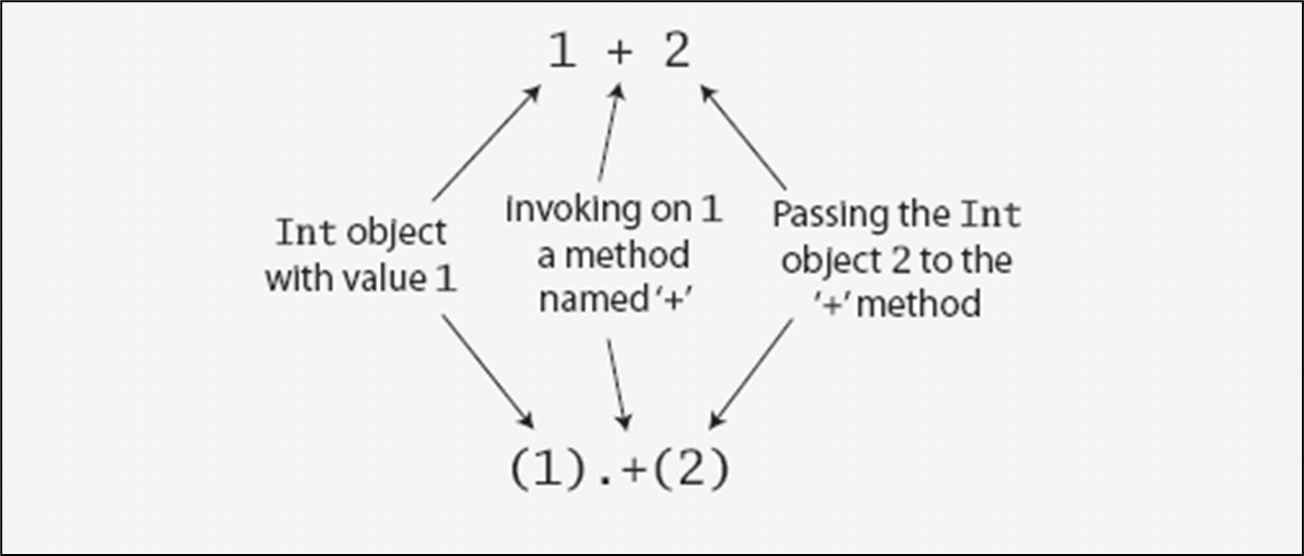

אם לא נממש את הפעולות האריתמטיות, נקבל שגיאה בעת הנסיון להפעילן:

In [57]:
p = Rational(2,3)
q = Rational(1,2)
p+q

TypeError: unsupported operand type(s) for +: 'Rational' and 'Rational'

### מימוש המתודה `__add__`

כעת נגרום לאופרטור `+` לעבוד כראוי באמצעות מימוש מתודת הקסם `__add__`.   
נזכיר כי הלוגיקה המתמטית של חיבור כזה נראית כך:

$$
a/b+c/d=(a\cdot d + c\cdot b)/(b\cdot d)
$$

בהתאמה, בפייתון ייראה כך:

In [ ]:
class Rational:
    def __init__(self, n, d=1):
        """n: numerator
        d: denominator"""
        if d == 0:
            print("denominator is set to 1, cannot be zero")
            d = 1
        self.numer = n
        self.denom = d
    
    def __repr__(self):
        return str(self.numer) + '/' + str(self.denom)
    
    ### New code here ###
    def __add__(self, other):
        return Rational(self.numer * other.denom + \
        other.numer * self.denom, \
        self.denom * other.denom)
    #####################
    
q = Rational(1,2)
r = Rational(2,3)
q+r

```{admonition} **שימו לב**
:class: error

יצרנו אופרטור אריתמטי שמחזיר לנו **אובייקט חדש** מהטיפוס של המחלקה ממנה הופעל. האובייקט החדש הזה מייצג את תוצאת הפעולה המתמטית.

```

להלן מימוש האופרטורים הנוספים עבור מחלקת `Rational`:

```python
def __neg__(self):
        return Rational(-self.numer, self.denom)

def __sub__(self, other):
        return self + (-other)

def __mul__(self, other):
        return Rational(self.numer * other.numer, \
                    self.denom * other.denom)

def __truediv__(self, other):
        return self * Rational(other.denom, other.numer)
        ### this implements /
        ### for // use __floordiv__
    
```    

וביחד, כמחלקה שלמה:

In [2]:
class Rational:
    def __init__(self, n, d=1):
        """n: numerator
        d: denominator"""
        if d == 0:
            print("denominator is set to 1, cannot be zero")
            d = 1
        self.numer = n
        self.denom = d
    
    def __repr__(self):
        return str(self.numer) + '/' + str(self.denom)
    
    def __add__(self, other):
        return Rational(self.numer * other.denom + \
        other.numer * self.denom, \
        self.denom * other.denom)
    
    ### New code here ###
    def __neg__(self):
        return Rational(-self.numer, self.denom)

    def __sub__(self, other):
        return self + (-other)

    def __mul__(self, other):
        return Rational(self.numer * other.numer, \
                    self.denom * other.denom)

    def __truediv__(self, other):
        return self * Rational(other.denom, other.numer)
        ### this implements /
        ### for // use __floordiv__    

כעת, לאחר שמימשנו את האופרטורים האריתמטיים, ניתן להשתמש באופרטורים הללו בדיוק כפי שהכרנו בעבר:

In [9]:
q = Rational(1,2)
p = Rational(2,3)

In [10]:
print(-q)

-1/2


In [11]:
print(q-p)

-1/6


In [12]:
print(q*p)

2/6


In [ ]:
print(q/p)

In [ ]:
print(q*(q+p))

In [13]:
print(q*p+q)

10/12


## אופרטורי השוואה

בדומה לאופרטורים אריתמטיים, ניתן לממש גם אופרטורי השוואה על מנת להשוות בצורה טבעית בין אובייקטים שונים מטיפוס המחלקה שלנו. 

כל פעם שאנחנו כותבים ביטוי כמו `x < y`, פייתון בעצם קוראת למתודה מתאימה שהוגדרה במחלקה:
- `x == y` → `__ eq__(self, other)`
- `x < y` →  `__lt__(self, other)`
- `x <= y` →  `__le__(self, other)`
- `x > y` →  `__gt__(self, other)`
- `x >= y` →  `__ge__(self, other)`

כל מתודה כזו מקבלת כפרמטרים את `self` ו-`other`, ומחזירה `True` או `False` אם אופרטור ההשוואה התקיים או לא, בהתאמה.

כפי שראינו קודם בפעולת החיבור, שימוש באופרטור השוואה ללא מימוש המתודת הקסם המתאימה יגרום לשגיאה

In [3]:
x = Rational(1,2)
y = Rational(1,3)
x > y

TypeError: '>' not supported between instances of 'Rational' and 'Rational'

עבור מחלקת `Rational`, מימוש אופרטורי ההשוואה יראה כך:

```python
    def __eq__(self, other):
        return self.numer * other.denom == other.numer * self.denom  # Why does it work? Convince yourself!

    def __lt__(self, other):
        return self.numer * other.denom < self.denom * other.numer

    def __le__(self, other):
        return self == other or self < other

    def __gt__(self, other):
        return not self <= other

    def __ge__(self, other):
        return not self < other
```

וביחד, כמחלקה שלמה:

In [66]:
class Rational:
    def __init__(self, n, d=1):
        """n: numerator
        d: denominator"""
        if d == 0:
            print("denominator is set to 1, cannot be zero")
            d = 1
        self.numer = n
        self.denom = d
    
    def __repr__(self):
        return str(self.numer) + '/' + str(self.denom)
    
    def __add__(self, other):
        return Rational(self.numer * other.denom + \
        other.numer * self.denom, \
        self.denom * other.denom)
    
    def __neg__(self):
        return Rational(-self.numer, self.denom)

    def __sub__(self, other):
        return self + (-other)

    def __mul__(self, other):
        return Rational(self.numer * other.numer, \
                    self.denom * other.denom)

    def __truediv__(self, other):
        return self * Rational(other.denom, other.numer)
        ### this implements /
        ### for // use __floordiv__
    
    ### New code here ###
    def __eq__(self, other):
        return self.numer * other.denom == other.numer * self.denom  # Why does it work? Convince yourself!

    def __lt__(self, other):
        return self.numer * other.denom < self.denom * other.numer

    def __le__(self, other):
        return self == other or self < other

    def __gt__(self, other):
        return not self <= other

    def __ge__(self, other):
        return not self < other
    #####################
    

כעת, לאחר שמימשנו את אופרטורים ההשוואה, נדגים את השימוש בהם:

In [ ]:
x = Rational(1,2)
y = Rational(1,3)

In [ ]:
print(x > y)

In [ ]:
print(x < y)

In [ ]:
print(x >= y)

In [ ]:
print(x <= y)

In [ ]:
print(max(x,y))

### שימוש בפונקציות המובנות `min`, `max`, ו-`sorted`

נתבונן בקוד הבא, וחשבו מה תדפיס השורה הבאה?

In [69]:
print(max([Rational(1,2),Rational(1,3), Rational(2,3)]))

2/3


```{admonition} **עצרו וחישבו:** כיצד פייתון ידע לבצע max על האובייקטים שלנו? הרי לא הגדרנו מתודה בשם max.
:class: dropdown, caution

`max` משתמשת במימוש שכתבנו ל-`__lt__` על מנת להגדיר יחס סדר, ועל פי יחס סדר זה ניתן לקבוע מי האיבר המקסימלי. אם לא היינו מגדירים את `__lt__` (או מתודה מובנית מקבילה אליה), היינו מקבלים שגיאה.

```

גם הפונקציות `min` ו-`sorted` עובדות באופן דומה:


In [70]:
print(min([Rational(1,2),Rational(1,3), Rational(2,3)]))

1/3


In [71]:
print(sorted([Rational(1,2),Rational(1,3), Rational(2,3)]))

[1/3, 1/2, 2/3]
